#### Learning how to do data modelling with Scikit-Learn Algorithms

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

sns.set(color_codes=True)

In [2]:
 iris = sns.load_dataset('iris')
iris = iris.dropna(axis=0)
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

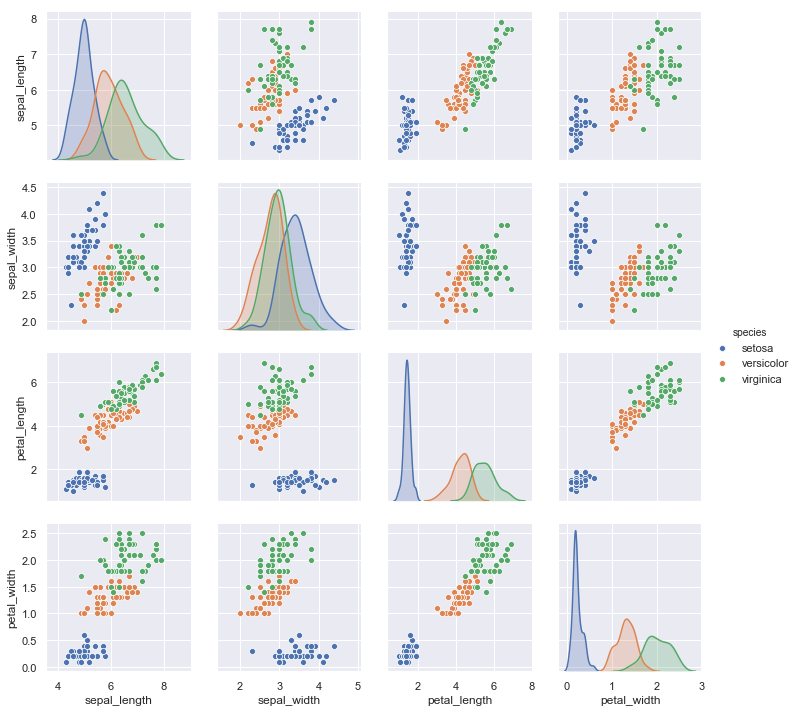

In [3]:
sns.pairplot(iris, hue="species")

# Supervised Learning
## Classification
### K-Neighbors Algorithm
This algorithm uses labelled data to predict where other certain new labelled data belongs to.

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
# Step 1: Import a class of model
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Initiate model with heper params
model = KNeighborsClassifier(n_neighbors=5)

# step 3.0: Modify data into desired feature and target matrices
X = iris.drop('species', axis=1).values
y = iris['species'].values

# Step 3.1: Divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# step 4: Fit/train the model with the training sets
model.fit(X_train, y_train)

# Step 5: # Predict outputs of training set
prediction = model.predict(X_test)
print("Prediction values: \n", prediction)

# Compute the accuracy score
score = model.score(X_test, y_test)
print("Score: ", score)

Prediction values: 
 ['virginica' 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor']
Score:  0.9777777777777777


## Comparing score values for different values of K

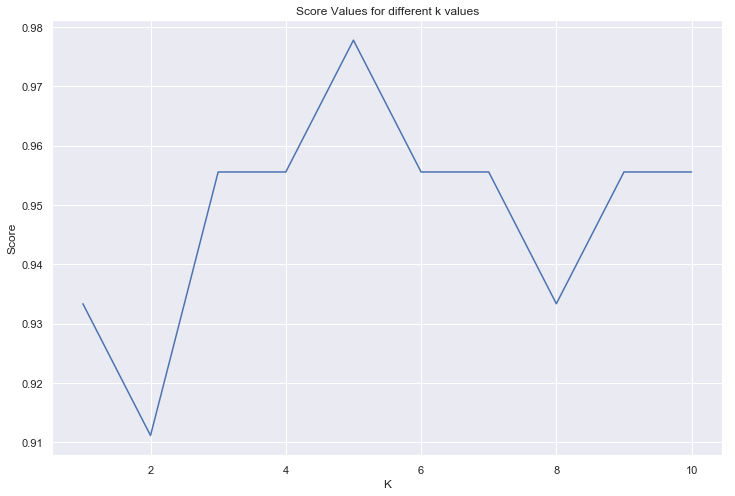

In [6]:
k_values = np.arange(1,11)
scores = []
# print(k_values)
for value in k_values:
    model = KNeighborsClassifier(n_neighbors=value)
    
    X = iris.drop('species', axis=1).values
    y = iris['species'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    
    scores.append(score)
    
# Plot score vs k
plt.figure(figsize=(12, 8))

plt.plot(k_values, scores)
plt.title('Score Values for different k values')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

## Cross validation: A better way of measuring accuracy
This tests on several sets of the data which are auto-generated accordingly
### Cross_Validation_Score

In [7]:
# We already have our model, feature and target ready
scores = cross_val_score(model, X, y, cv=5) # imported from sklearn.model_selection
print("scores: ", scores)
print("Mean: ", scores.mean())

scores:  [0.96666667 1.         1.         0.93333333 1.        ]
Mean:  0.9800000000000001


## NAIVE BAYES CLASSIFICATION
### Gaussian NB model

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Using the Iris split data
model = GaussianNB()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor'], dtype='<U10')

In [9]:
score = accuracy_score(y_test, predictions)
score

0.9111111111111111

# Linear Regression
Obtains Line of Best fit
<br>
Aims at minimizing cost functions

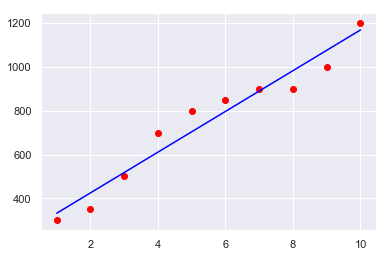

In [10]:
from sklearn.linear_model import LinearRegression

# prepare data
# X, predictor var, house size in K sq feet 
X = np.arange(1, 11)
# print(X)
# y, observed response, price of hose in $
y = np.array([300, 350, 500, 700, 800, 850, 900, 900, 1000, 1200])
# print y

model = LinearRegression()

X = X[:, np.newaxis]

model.fit(X, y)

predictions = model.predict(X)

plt.figure()
plt.scatter(X, y, color='red')
plt.plot(X, predictions, color='blue')
plt.show()

In [11]:
model.score(X, y)

0.945818181818182

In [12]:
model.coef_

array([92.72727273])

In [13]:
model.intercept_

239.9999999999999

Hence, our regression formular is **y=240 + 92.7x**

# Logistic Regression
#### Using the iris dataset

In [14]:
iris_dataset = sns.load_dataset('iris')
iris_dataset.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


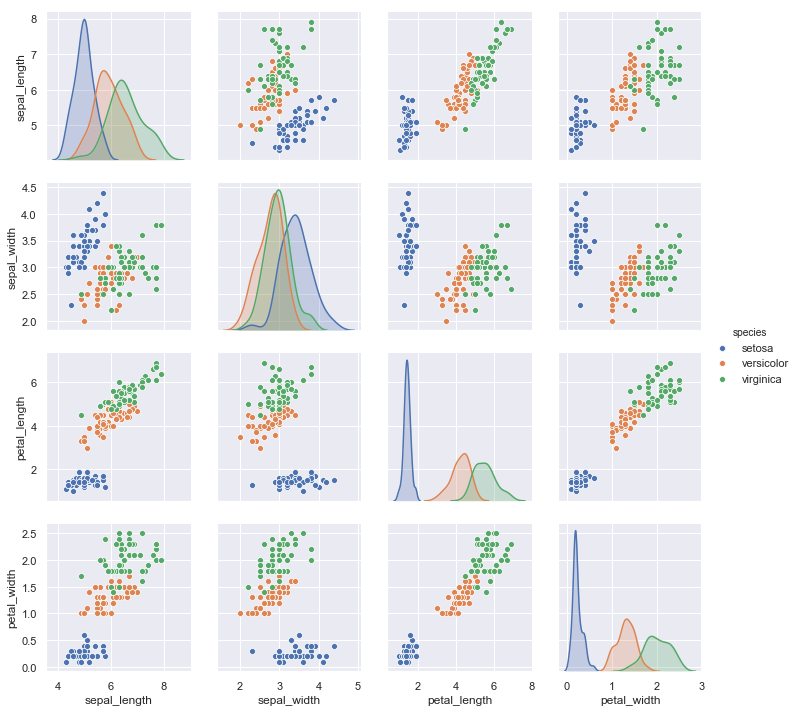

In [18]:
sns.pairplot(iris_dataset, hue='species', height=2.5)